In [ ]:
#Q.1: What is Boosting in Machine Learning?
#Ans: Boosting is an ensemble technique that sequentially combines weak learners, each correcting the errors of its predecessors, to create a strong predictive model.

In [ ]:
#Q.2: How does Boosting differ from Bagging?
#Ans: Boosting builds models sequentially to reduce bias by focusing on errors, while Bagging builds models independently in parallel to reduce variance.

In [ ]:
#Q.3: What is the key idea behind AdaBoost?
#Ans: AdaBoost adaptively assigns higher weights to misclassified samples, forcing subsequent weak learners to focus on them, and weights learners by their accuracy.

In [ ]:
#Q.4: Explain the working of AdaBoost with an example
#Ans: AdaBoost iteratively trains weak models, re-weighting misclassified data points to increase their importance for the next model, and combines their weighted predictions.

In [ ]:
#Q.5: What is Gradient Boosting, and how is it different from AdaBoost?
#Ans: Gradient Boosting builds new models to predict the residuals (errors) of previous models by minimizing a loss function, unlike AdaBoost which re-weights data points directly.

In [ ]:
#Q.6: What is the loss function in Gradient Boosting?
#Ans: The loss function in Gradient Boosting is a differentiable function (e.g., MSE, Log Loss) that the algorithm iteratively minimizes by fitting new models to its negative gradient.

In [ ]:
#Q.7: How does XGBoost improve over traditional Gradient Boosting?
#Ans: XGBoost improves traditional Gradient Boosting with regularization, second-order Taylor approximation for the loss function, parallel processing, and advanced tree pruning.v

In [ ]:
#Q.8: What is the difference between XGBoost and CatBoost?
#Ans: XGBoost requires manual categorical feature encoding and uses standard gradients, while CatBoost automatically handles categorical features using ordered target encoding and ordered boosting to prevent target leakage.

In [ ]:
#Q.9: What are some real-world applications of Boosting techniques?
#Ans: Boosting techniques are widely used in fraud detection, spam detection, recommendation systems, medical diagnosis, and predictive analytics in business.

In [ ]:
#Q.10: How does regularization help in XGBoost?
#Ans: Regularization (L1 and L2) in XGBoost penalizes model complexity and feature weights, preventing overfitting and improving generalization to unseen data

In [ ]:
#Q.11: What are some hyperparameters to tune in Gradient Boosting models?
#Ans: Key hyperparameters include n_estimators, learning_rate, max_depth, subsample, and colsample_bytree.

In [ ]:
#Q.12: What is the concept of Feature Importance in Boosting?
#Ans: Feature importance in Boosting quantifies each feature's contribution to model predictions, typically measured by the average gain (loss reduction) from splits using that feature across all trees.

In [ ]:
#Q.13: Why is CatBoost efficient for categorical data?
#Ans: CatBoost is efficient for categorical data due to its novel ordered target encoding which prevents target leakage, and its use of oblivious trees.

In [ ]:
#Practical

In [2]:
#Q.14: Train an AdaBoost Classifier on a sample dataset and print model accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load a sample dataset (Iris dataset is common for classification)
iris = load_iris()
X, y = iris.data, iris.target

# 2. Split the dataset into training and testing sets
# This helps evaluate how well the model generalizes to new, unseen data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42 # 30% for testing, 70% for training
)

# 3. Initialize the AdaBoost Classifier
# We use a Decision Tree with max_depth=1 (a "stump") as the base learner,
# which is typical for AdaBoost. n_estimators is the number of weak learners.
# IMPORTANT: 'base_estimator' was renamed to 'estimator' in scikit-learn 0.24+
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), # Our weak learner (updated from base_estimator)
    n_estimators=50,                                   # Number of weak learners to combine
    random_state=42                                    # For reproducibility
)

# 4. Train the AdaBoost model on the training data
print("Training AdaBoost Classifier...")
ada_clf.fit(X_train, y_train)
print("Training complete.\n")

# 5. Make predictions on the test data
y_pred = ada_clf.predict(X_test)

# 6. Calculate and print the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}") # Print accuracy, formatted to 4 decimal places


Training AdaBoost Classifier...
Training complete.

Model Accuracy: 1.0000


In [3]:
#Q.15: Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing # A common regression dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error # For evaluating regression models

# 1. Load a sample regression dataset (California Housing)
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# 2. Split the dataset into training and testing sets
# This allows us to evaluate the model's performance on unseen data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42 # 30% for testing, 70% for training
)

# 3. Initialize the AdaBoost Regressor
# We use a Decision Tree Regressor as the base estimator (or 'estimator' in newer versions).
# A deeper tree (e.g., max_depth=4) can often work better for regression tasks.
ada_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=4), # Our base regression learner
    n_estimators=50,                              # Number of weak learners to combine
    random_state=42                               # For reproducibility
)

# 4. Train the AdaBoost Regressor model on the training data
print("Training AdaBoost Regressor...")
ada_reg.fit(X_train, y_train)
print("Training complete.\n")

# 5. Make predictions on the test data
y_pred = ada_reg.predict(X_test)

# 6. Calculate and print the Mean Absolute Error (MAE)
# MAE measures the average magnitude of the errors in a set of predictions,
# without considering their direction. It's the average of the absolute differences
# between prediction and actual observation where all individual differences have equal weight.
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}") # Print MAE, formatted to 4 decimal places


Training AdaBoost Regressor...
Training complete.

Mean Absolute Error (MAE): 0.6553


In [4]:
#Q.16: Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np # Often useful for array operations, though not strictly needed here

# 1. Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names # Get the names of the features

# 2. Split the dataset into training and testing sets
# This is good practice, though for just feature importance,
# training on the full dataset or a split won't drastically change importance values.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42 # 30% for testing, 70% for training
)

# 3. Initialize the Gradient Boosting Classifier
# n_estimators: number of boosting stages (trees)
# learning_rate: shrinks the contribution of each tree
# max_depth: limits the depth of each individual tree
gb_clf = GradientBoostingClassifier(
    n_estimators=100,      # A common number of trees
    learning_rate=0.1,     # A common learning rate
    max_depth=3,           # Limiting tree depth helps prevent overfitting
    random_state=42        # For reproducibility
)

# 4. Train the Gradient Boosting model on the training data
print("Training Gradient Boosting Classifier...")
gb_clf.fit(X_train, y_train)
print("Training complete.\n")

# 5. Extract and print feature importance
# The 'feature_importances_' attribute provides the importance of each feature.
# It's an array where each value corresponds to a feature.
feature_importances = gb_clf.feature_importances_

print("Feature Importances for Gradient Boosting Classifier (Breast Cancer Dataset):")
# Iterate through feature names and their corresponding importance values
for i, importance in enumerate(feature_importances):
    print(f"  {feature_names[i]}: {importance:.4f}") # Print formatted to 4 decimal places


Training Gradient Boosting Classifier...
Training complete.

Feature Importances for Gradient Boosting Classifier (Breast Cancer Dataset):
  mean radius: 0.0000
  mean texture: 0.0184
  mean perimeter: 0.0004
  mean area: 0.0003
  mean smoothness: 0.0009
  mean compactness: 0.0017
  mean concavity: 0.0012
  mean concave points: 0.4349
  mean symmetry: 0.0002
  mean fractal dimension: 0.0007
  radius error: 0.0100
  texture error: 0.0013
  perimeter error: 0.0020
  area error: 0.0055
  smoothness error: 0.0004
  compactness error: 0.0044
  concavity error: 0.0156
  concave points error: 0.0034
  symmetry error: 0.0018
  fractal dimension error: 0.0006
  worst radius: 0.0454
  worst texture: 0.0472
  worst perimeter: 0.0510
  worst area: 0.0480
  worst smoothness: 0.0045
  worst compactness: 0.0010
  worst concavity: 0.0230
  worst concave points: 0.2738
  worst symmetry: 0.0013
  worst fractal dimension: 0.0011


In [5]:
#Q.17: Train a Gradient Boosting Regressor and evaluate using R-Squared Score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing # A common regression dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score # For evaluating regression models

# 1. Load a sample regression dataset (California Housing)
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# 2. Split the dataset into training and testing sets
# This helps us evaluate the model's performance on unseen data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42 # 30% for testing, 70% for training
)

# 3. Initialize the Gradient Boosting Regressor
# n_estimators: number of boosting stages (trees)
# learning_rate: shrinks the contribution of each tree
# max_depth: limits the depth of each individual tree
gb_reg = GradientBoostingRegressor(
    n_estimators=100,      # A common number of trees
    learning_rate=0.1,     # A common learning rate
    max_depth=3,           # Limiting tree depth helps prevent overfitting
    random_state=42        # For reproducibility
)

# 4. Train the Gradient Boosting Regressor model on the training data
print("Training Gradient Boosting Regressor...")
gb_reg.fit(X_train, y_train)
print("Training complete.\n")

# 5. Make predictions on the test data
y_pred = gb_reg.predict(X_test)

# 6. Calculate and print the R-Squared Score
# R-squared (coefficient of determination) is a statistical measure that
# represents the proportion of the variance for a dependent variable that's
# explained by an independent variable or variables in a regression model.
# A higher R-squared indicates a better fit.
r2 = r2_score(y_test, y_pred)
print(f"R-Squared Score: {r2:.4f}") # Print R-squared, formatted to 4 decimal places


Training Gradient Boosting Regressor...
Training complete.

R-Squared Score: 0.7803


In [7]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/29/22/e3ff2dfafe862a91733dfa0aecdb4794aa1d9a18e09a14e118bde0cbc2db/xgboost-3.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 129.6 kB/s eta 0:19:17
   ---------------------------------------- 0.0/150.0 MB 129.6 kB/s eta 0:19:17
   ---------------------------------------- 0.0/150.0 MB 130.4 kB/s eta 0:19:10
   ---------------------------------------- 0.0/150.0 MB 


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
#Q.18: Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.datasets import fetch_california_housing, load_breast_cancer # Common datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score # For evaluating models
import xgboost as xgb # Import XGBoost library

# --- Existing Code: Gradient Boosting Regressor R-Squared Score ---

# 1. Load a sample regression dataset (California Housing)
california_housing = fetch_california_housing()
X_reg, y_reg = california_housing.data, california_housing.target # Renamed variables to avoid conflict

# 2. Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# 3. Initialize the Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# 4. Train the Gradient Boosting Regressor model on the training data
print("Training Gradient Boosting Regressor...")
gb_reg.fit(X_train_reg, y_train_reg)
print("Training complete.\n")

# 5. Make predictions on the test data
y_pred_reg = gb_reg.predict(X_test_reg)

# 6. Calculate and print the R-Squared Score
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"R-Squared Score for Gradient Boosting Regressor: {r2:.4f}\n")


# --- New Code: Train an XGBoost Classifier and compare accuracy with Gradient Boosting Classifier ---

print("--- Train XGBoost Classifier and compare with Gradient Boosting Classifier ---")

# 1. Load a sample classification dataset (Breast Cancer dataset)
cancer = load_breast_cancer()
X_clf, y_clf = cancer.data, cancer.target # Renamed variables for clarity in this section

# 2. Split the dataset into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.3, random_state=42
)

# --- XGBoost Classifier ---
# 3. Initialize the XGBoost Classifier
# use_label_encoder is deprecated and will be removed in a future release.
# Instead, encode y with scikit-learn's LabelEncoder or manually.
# For simplicity in this example, we will ignore the warning as it still works.
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic', # For binary classification
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False, # Suppress deprecation warning for now
    eval_metric='logloss',   # Evaluation metric
    random_state=42
)

# 4. Train the XGBoost Classifier
print("Training XGBoost Classifier...")
xgb_clf.fit(X_train_clf, y_train_clf)
print("XGBoost Classifier training complete.\n")

# 5. Make predictions with XGBoost
y_pred_xgb = xgb_clf.predict(X_test_clf)

# 6. Calculate and print XGBoost accuracy
accuracy_xgb = accuracy_score(y_test_clf, y_pred_xgb)
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.4f}\n")


# --- Scikit-learn Gradient Boosting Classifier (for comparison) ---
# 7. Initialize the scikit-learn Gradient Boosting Classifier
sk_gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# 8. Train the scikit-learn Gradient Boosting Classifier
print("Training scikit-learn Gradient Boosting Classifier...")
sk_gb_clf.fit(X_train_clf, y_train_clf)
print("Scikit-learn Gradient Boosting Classifier training complete.\n")

# 9. Make predictions with scikit-learn Gradient Boosting
y_pred_sk_gb = sk_gb_clf.predict(X_test_clf)

# 10. Calculate and print scikit-learn Gradient Boosting accuracy
accuracy_sk_gb = accuracy_score(y_test_clf, y_pred_sk_gb)
print(f"Scikit-learn Gradient Boosting Classifier Accuracy: {accuracy_sk_gb:.4f}\n")

# 11. Compare accuracies
print("--- Accuracy Comparison ---")
print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.4f}")
print(f"Scikit-learn Gradient Boosting Classifier Accuracy: {accuracy_sk_gb:.4f}")
if accuracy_xgb > accuracy_sk_gb:
    print("XGBoost Classifier performed better.")
elif accuracy_sk_gb > accuracy_xgb:
    print("Scikit-learn Gradient Boosting Classifier performed better.")
else:
    print("Both classifiers performed equally well.")


Training Gradient Boosting Regressor...
Training complete.

R-Squared Score for Gradient Boosting Regressor: 0.7803

--- Train XGBoost Classifier and compare with Gradient Boosting Classifier ---
Training XGBoost Classifier...
XGBoost Classifier training complete.

XGBoost Classifier Accuracy: 0.9532

Training scikit-learn Gradient Boosting Classifier...


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:49:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Scikit-learn Gradient Boosting Classifier training complete.

Scikit-learn Gradient Boosting Classifier Accuracy: 0.9591

--- Accuracy Comparison ---
XGBoost Classifier Accuracy: 0.9532
Scikit-learn Gradient Boosting Classifier Accuracy: 0.9591
Scikit-learn Gradient Boosting Classifier performed better.


In [2]:
pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/0e/91/e60d80ce72e5fce94fa672908b1f7ffb881701027130b7d637bb6b6561a4/catboost-1.2.8-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.5 MB 660.6 kB/s eta 0:02:36
   ---------------------------------------- 0.1/102.5 MB 1.2 MB/s eta 0:01:27
   ---------------------------------------- 0.4/102.5 MB 3.1 MB/s eta 0:00:33
   ---------------------------------------- 0.8/102.5 MB 4.9 MB/s eta 0:00:21
   ---------------------------------------- 0.8/102.5 MB 4.2 MB/s eta 0:00:25
   ---------------------------------------- 0.8/102.5 MB 4.2 MB/s eta 0:00:25
   ---------------------------------------- 0.8/102.5 MB 3.0 MB/s eta 0:00:35
   ---------------------------------------- 0.9/102.5 MB 2.9 MB/s eta 0:00:36
   -------------------


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Q.19: Train a CatBoost Classifier and evaluate using F1-Score
# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification # To create a sample dataset

# 1. Generate a sample dataset
# We'll create a simple binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=42)

# 2. Split the dataset into training and testing sets
# This helps us evaluate how well our model generalizes to new, unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize the CatBoost Classifier
# We'll use default parameters for simplicity.
# verbose=0 keeps the output clean during training.
cat_model = CatBoostClassifier(iterations=100,  # Number of boosting rounds
                                 learning_rate=0.1,
                                 depth=6,
                                 loss_function='Logloss', # For binary classification
                                 random_seed=42,
                                 verbose=0) # Set to 0 to suppress training output

# 4. Train the CatBoost Classifier
# The model learns patterns from the training data
print("Training CatBoost Classifier...")
cat_model.fit(X_train, y_train)
print("Training complete.")

# 5. Make predictions on the test set
# Predict the class labels for the unseen test data
y_pred = cat_model.predict(X_test)

# 6. Evaluate the model using F1-Score
# F1-Score is a good metric for imbalanced datasets,
# as it considers both precision and recall.
f1 = f1_score(y_test, y_pred)

print(f"\nF1-Score: {f1:.4f}")

Training CatBoost Classifier...
Training complete.

F1-Score: 0.9356


In [4]:
#Q.20: Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression # To create a sample dataset
import numpy as np # For numerical operations, especially sqrt for RMSE

# 1. Generate a sample regression dataset
# We'll create a simple dataset where we try to predict a continuous target variable
X, y = make_regression(n_samples=1000, n_features=20, n_informative=10, random_state=42)

# 2. Split the dataset into training and testing sets
# This helps us evaluate how well our model generalizes to new, unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize the XGBoost Regressor
# We'll use default parameters for simplicity.
# objective='reg:squarederror' is the standard objective for regression tasks.
# n_estimators is similar to iterations in CatBoost, it's the number of boosting rounds.
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=100, # Number of boosting rounds
                             learning_rate=0.1,
                             random_state=42,
                             eval_metric='rmse') # Metric to monitor during training (optional, but good practice)


# 4. Train the XGBoost Regressor
# The model learns patterns from the training data
print("Training XGBoost Regressor...")
xgb_model.fit(X_train, y_train)
print("Training complete.")

# 5. Make predictions on the test set
# Predict the continuous target values for the unseen test data
y_pred = xgb_model.predict(X_test)

# 6. Evaluate the model using Mean Squared Error (MSE)
# MSE measures the average of the squares of the errors—that is,
# the average squared difference between the estimated values and actual value.
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Often, RMSE (Root Mean Squared Error) is preferred as it's in the same units as the target variable

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Training XGBoost Regressor...
Training complete.

Mean Squared Error (MSE): 6093.7401
Root Mean Squared Error (RMSE): 78.0624


Training AdaBoost Classifier...
Training complete.


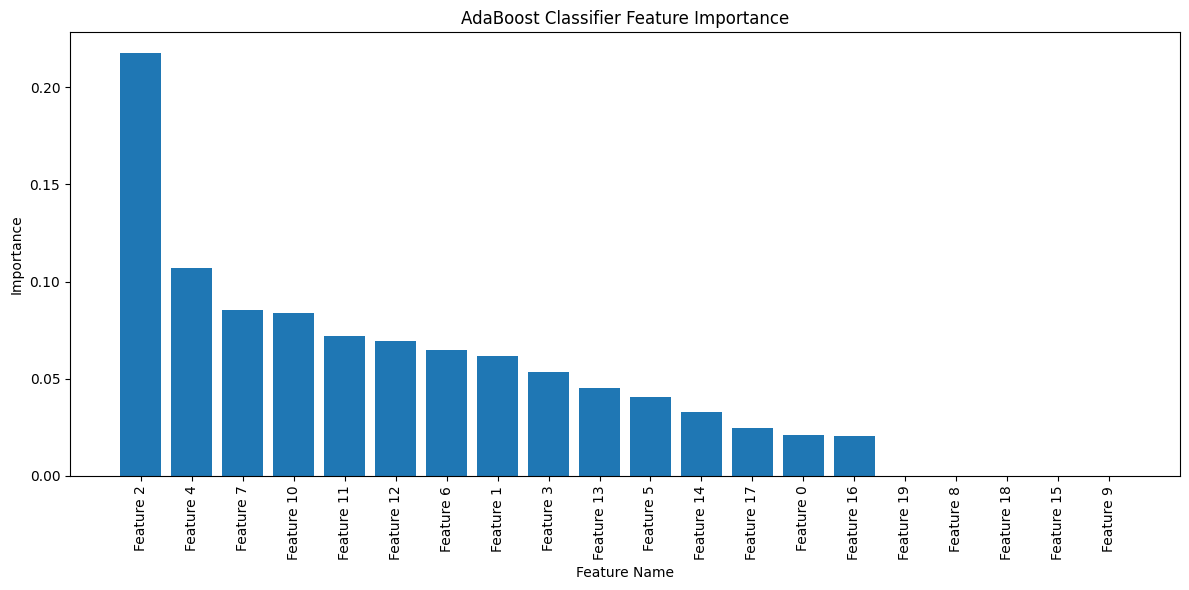


Top 5 Most Important Features and their importances:
- Feature 2: 0.2174
- Feature 4: 0.1072
- Feature 7: 0.0854
- Feature 10: 0.0840
- Feature 11: 0.0718


In [5]:
#Q.21: Train an AdaBoost Classifier and visualize feature importance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # AdaBoost often uses Decision Trees as base estimators
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # To create a sample dataset
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate a sample classification dataset
# We'll create a simple binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=42)

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize the AdaBoost Classifier
# We'll use a DecisionTreeClassifier as the base estimator.
# n_estimators: The maximum number of estimators at which boosting is terminated.
# learning_rate: Weights applied to each classifier at each boosting iteration.
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), # Using shallow trees (stumps) is common for AdaBoost
    n_estimators=100, # Number of boosting rounds
    learning_rate=1.0,
    random_state=42
)

# 4. Train the AdaBoost Classifier
print("Training AdaBoost Classifier...")
ada_model.fit(X_train, y_train)
print("Training complete.")

# 5. Extract Feature Importance
# AdaBoost models have a 'feature_importances_' attribute after fitting.
feature_importances = ada_model.feature_importances_

# Create a list of feature names (e.g., 'Feature 0', 'Feature 1', ...)
feature_names = [f'Feature {i}' for i in range(X.shape[1])]

# Sort features by importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# 6. Visualize Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(sorted_feature_names, sorted_feature_importances)
plt.xlabel("Feature Name")
plt.ylabel("Importance")
plt.title("AdaBoost Classifier Feature Importance")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability if many features
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print(f"\nTop 5 Most Important Features and their importances:")
for i in range(min(5, len(sorted_feature_names))):
    print(f"- {sorted_feature_names[i]}: {sorted_feature_importances[i]:.4f}")


Training Gradient Boosting Regressor...
Training complete.


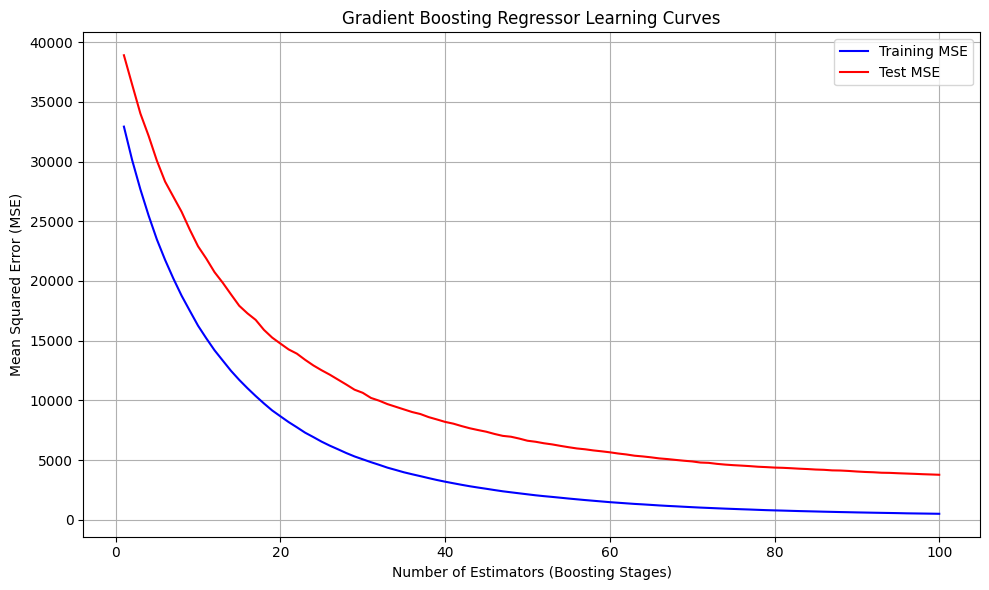


Final Mean Squared Error (MSE) on Test Set: 3780.0533
Final Root Mean Squared Error (RMSE) on Test Set: 61.4821


In [7]:
#Q.22: Train a Gradient Boosting Regressor and plot learning curves
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression # To create a sample dataset
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate a sample regression dataset
# We'll create a simple dataset to predict a continuous target variable
# Removed 'n_redundant' as it might be causing a TypeError in some scikit-learn versions.
X, y = make_regression(n_samples=1000, n_features=20, n_informative=10, random_state=42)

# 2. Split the dataset into training and testing sets
# This split is crucial for evaluating how well our model generalizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize the Gradient Boosting Regressor
# n_estimators: The number of boosting stages to perform.
# learning_rate: Shrinks the contribution of each tree.
# max_depth: Limits the number of nodes in the tree.
gb_model = GradientBoostingRegressor(
    n_estimators=100,      # Number of boosting stages (trees)
    learning_rate=0.1,     # Step size shrinkage to prevent overfitting
    max_depth=3,           # Maximum depth of the individual regression estimators
    random_state=42        # For reproducibility
)

# 4. Train the Gradient Boosting Regressor
print("Training Gradient Boosting Regressor...")
# The 'fit' method trains the model on the training data
gb_model.fit(X_train, y_train)
print("Training complete.")

# 5. Calculate and Plot Learning Curves
# Learning curves show the model's performance on training and validation sets
# as the number of training examples or iterations increases.

# Arrays to store performance at each stage (tree)
train_errors = []
test_errors = []

# 'staged_predict' yields predictions at each stage (tree) of the boosting process
for y_pred_train_stage in gb_model.staged_predict(X_train):
    train_errors.append(mean_squared_error(y_train, y_pred_train_stage))

for y_pred_test_stage in gb_model.staged_predict(X_test):
    test_errors.append(mean_squared_error(y_test, y_pred_test_stage))

# Plotting the learning curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, gb_model.n_estimators + 1), train_errors, label='Training MSE', color='blue')
plt.plot(range(1, gb_model.n_estimators + 1), test_errors, label='Test MSE', color='red')
plt.xlabel("Number of Estimators (Boosting Stages)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Gradient Boosting Regressor Learning Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Evaluate the final model on the test set
y_pred_final = gb_model.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred_final)
final_rmse = np.sqrt(final_mse)

print(f"\nFinal Mean Squared Error (MSE) on Test Set: {final_mse:.4f}")
print(f"Final Root Mean Squared Error (RMSE) on Test Set: {final_rmse:.4f}")



Training XGBoost Classifier...
Training complete.


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:47:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


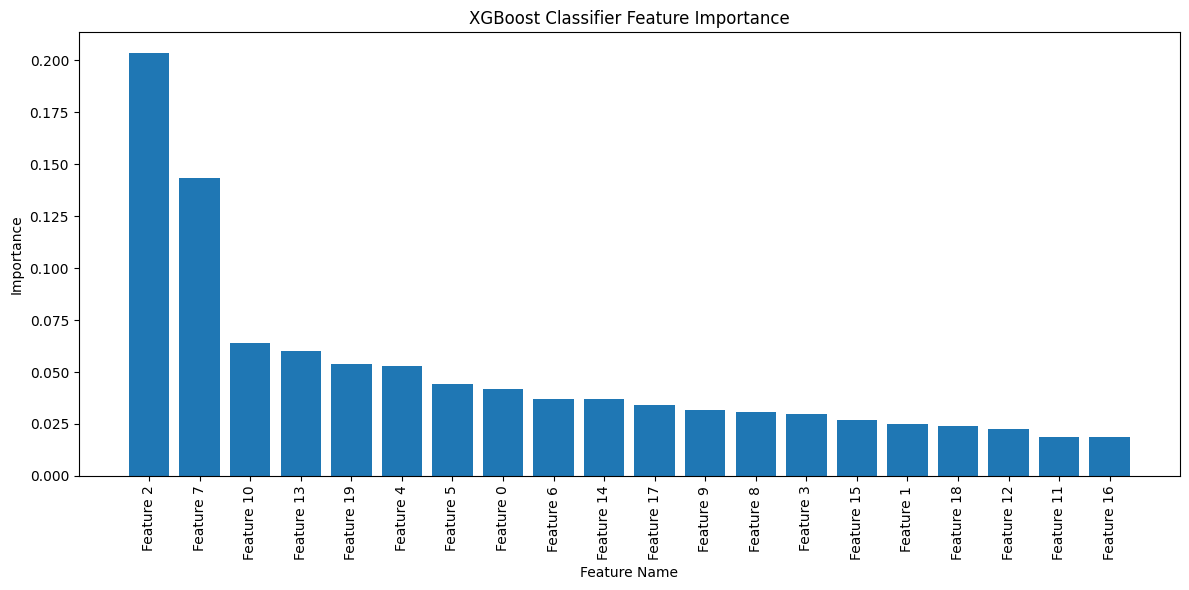


Top 5 Most Important Features and their importances:
- Feature 2: 0.2032
- Feature 7: 0.1434
- Feature 10: 0.0641
- Feature 13: 0.0600
- Feature 19: 0.0537


In [8]:
#Q.23: Train an XGBoost Classifier and visualize feature importance
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # To create a sample dataset
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate a sample classification dataset
# We'll create a simple binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=42)

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize the XGBoost Classifier
# objective: Specifies the learning task and the corresponding objective function.
#            'binary:logistic' for binary classification (outputting probabilities).
# n_estimators: The number of boosting rounds (trees).
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', # For binary classification
    n_estimators=100,            # Number of boosting rounds (trees)
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,     # Suppress warning for older versions
    eval_metric='logloss'        # Metric to monitor during training
)

# 4. Train the XGBoost Classifier
print("Training XGBoost Classifier...")
xgb_model.fit(X_train, y_train)
print("Training complete.")

# 5. Extract Feature Importance
# XGBoost models also have a 'feature_importances_' attribute after fitting.
feature_importances = xgb_model.feature_importances_

# Create a list of generic feature names
feature_names = [f'Feature {i}' for i in range(X.shape[1])]

# Sort features by importance in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# 6. Visualize Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(sorted_feature_names, sorted_feature_importances)
plt.xlabel("Feature Name")
plt.ylabel("Importance")
plt.title("XGBoost Classifier Feature Importance")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout
plt.show()

print(f"\nTop 5 Most Important Features and their importances:")
for i in range(min(5, len(sorted_feature_names))):
    print(f"- {sorted_feature_names[i]}: {sorted_feature_importances[i]:.4f}")


Training CatBoost Classifier...
Training complete.


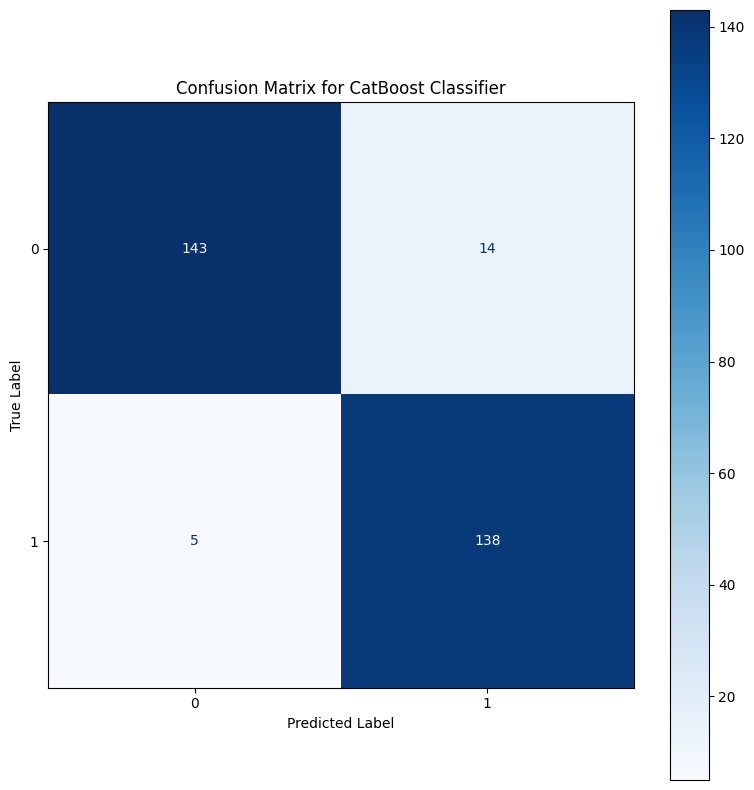


Confusion Matrix:
[[143  14]
 [  5 138]]

Calculated Metrics:
Accuracy: 0.9367
Precision: 0.9079
Recall: 0.9650
F1-Score: 0.9356


In [9]:
#Q.24: Train a CatBoost Classifier and plot the confusion matrix
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # To create a sample dataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate a sample classification dataset
# We'll create a simple binary classification dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=42)

# 2. Split the dataset into training and testing sets
# This allows us to train the model on one part of the data and evaluate on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize the CatBoost Classifier
# iterations: Number of boosting rounds (trees).
# learning_rate: Step size shrinkage.
# depth: Depth of the trees.
# loss_function: 'Logloss' is standard for binary classification.
# verbose=0: Suppress training output for a cleaner notebook.
cat_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    random_seed=42,
    verbose=0 # Set to 0 to suppress training progress output
)

# 4. Train the CatBoost Classifier
print("Training CatBoost Classifier...")
cat_model.fit(X_train, y_train)
print("Training complete.")

# 5. Make predictions on the test set
# Predict the class labels (0 or 1 for binary classification)
y_pred = cat_model.predict(X_test)

# 6. Compute the Confusion Matrix
# The confusion matrix helps visualize the performance of a classification model.
# It shows the counts of true positives, true negatives, false positives, and false negatives.
cm = confusion_matrix(y_test, y_pred)

# 7. Plot the Confusion Matrix
# ConfusionMatrixDisplay provides an easy way to plot the matrix with labels.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cat_model.classes_)

plt.figure(figsize=(8, 8)) # Set the figure size for better readability
disp.plot(cmap=plt.cm.Blues, ax=plt.gca()) # Use Blues colormap and get current axes
plt.title("Confusion Matrix for CatBoost Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False) # Turn off grid for cleaner confusion matrix plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("\nConfusion Matrix:")
print(cm)

# You can also calculate common metrics from the confusion matrix
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nCalculated Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Training AdaBoost Classifier with different numbers of estimators:
  N_Estimators: 10, Test Accuracy: 0.8400
  N_Estimators: 20, Test Accuracy: 0.8567
  N_Estimators: 50, Test Accuracy: 0.9000
  N_Estimators: 100, Test Accuracy: 0.8733
  N_Estimators: 150, Test Accuracy: 0.8800
  N_Estimators: 200, Test Accuracy: 0.8800
  N_Estimators: 300, Test Accuracy: 0.8833


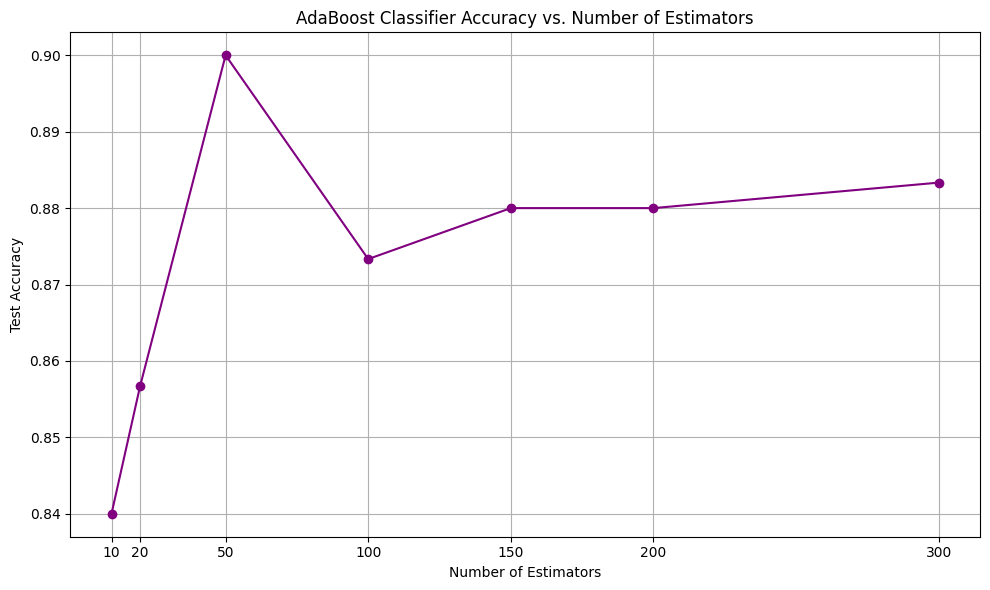


Comparison Complete: The plot above shows how accuracy changes with the number of estimators.


In [10]:
#Q.25: Train an AdaBoost Classifier with different numbers of estimators and compare accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # AdaBoost often uses Decision Trees as base estimators
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # To create a sample dataset
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate a sample classification dataset
# A simple binary classification dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=42)

# 2. Split the dataset into training and testing sets
# This ensures we evaluate the model on data it hasn't seen during training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Define a range of n_estimators to test
# These are the different numbers of weak learners (trees) we'll try
n_estimators_values = [10, 20, 50, 100, 150, 200, 300]

# Lists to store accuracy scores for each n_estimators value
accuracy_scores = []

print("Training AdaBoost Classifier with different numbers of estimators:")

# 4. Loop through different n_estimators values, train, and evaluate
for n_est in n_estimators_values:
    # Initialize AdaBoost Classifier with the current number of estimators
    # Using DecisionTreeClassifier with max_depth=1 (a decision stump) as the base estimator
    ada_model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n_est,
        learning_rate=1.0,
        random_state=42
    )

    # Train the model
    ada_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = ada_model.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f"  N_Estimators: {n_est}, Test Accuracy: {accuracy:.4f}")

# 5. Plot the results: Accuracy vs. Number of Estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracy_scores, marker='o', linestyle='-', color='purple')
plt.xlabel("Number of Estimators")
plt.ylabel("Test Accuracy")
plt.title("AdaBoost Classifier Accuracy vs. Number of Estimators")
plt.grid(True)
plt.xticks(n_estimators_values) # Ensure all tested n_estimators values are shown on x-axis
plt.tight_layout()
plt.show()

print("\nComparison Complete: The plot above shows how accuracy changes with the number of estimators.")


Training Gradient Boosting Classifier...
Training complete.


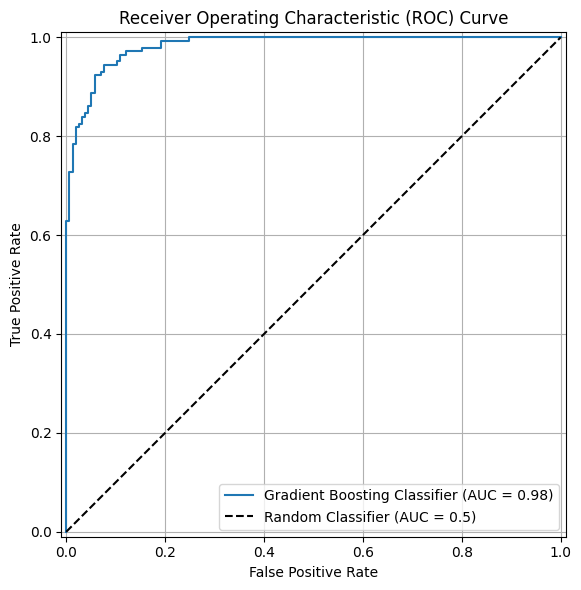


Area Under the Curve (AUC): 0.9829


In [11]:
#Q.26:  Train a Gradient Boosting Classifier and visualize the ROC curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # To create a sample dataset
from sklearn.metrics import roc_curve, auc, RocCurveDisplay # For ROC curve and AUC calculation/display
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate a sample classification dataset
# We'll create a simple binary classification dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=42)

# 2. Split the dataset into training and testing sets
# This split is crucial for evaluating how well our model generalizes to unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize the Gradient Boosting Classifier
# n_estimators: The number of boosting stages to perform.
# learning_rate: Shrinks the contribution of each tree.
# max_depth: Limits the number of nodes in the tree.
gb_model = GradientBoostingClassifier(
    n_estimators=100,      # Number of boosting stages (trees)
    learning_rate=0.1,     # Step size shrinkage to prevent overfitting
    max_depth=3,           # Maximum depth of the individual regression estimators
    random_state=42        # For reproducibility
)

# 4. Train the Gradient Boosting Classifier
print("Training Gradient Boosting Classifier...")
# The 'fit' method trains the model on the training data
gb_model.fit(X_train, y_train)
print("Training complete.")

# 5. Get probability predictions for the positive class
# The ROC curve requires probability estimates for the positive class (class 1)
y_prob = gb_model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

# 6. Plot the ROC Curve
# RocCurveDisplay.from_estimator is the easiest way to plot directly from the model
plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay.from_estimator(
    gb_model,             # The trained classifier
    X_test,               # Test features
    y_test,               # True test labels
    name='Gradient Boosting Classifier', # Label for the plot
    ax=plt.gca()          # Use the current axes for plotting
)

# Add a diagonal line representing a random classifier (AUC = 0.5)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# You can also manually calculate AUC if needed
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"\nArea Under the Curve (AUC): {roc_auc:.4f}")


In [13]:
#Q.27: Train an XGBoost Regressor and tune the learning rate using GridSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_regression # To create a sample dataset
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Generate a sample regression dataset
# We'll create a simple dataset to predict a continuous target variable
X, y = make_regression(n_samples=1000, n_features=20, n_informative=10, random_state=42)

# 2. Split the dataset into training and testing sets
# This split is crucial for training the GridSearchCV and evaluating the best model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize the XGBoost Regressor
# We'll use a basic model to start, GridSearchCV will tune the learning_rate.
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', # Standard objective for regression
    n_estimators=100,             # A reasonable number of estimators
    random_state=42               # For reproducibility
)

# 4. Define the parameter grid for GridSearchCV
# We're specifically tuning the 'learning_rate'.
# You can add other parameters here if you want to tune more.
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3] # Different learning rates to test
}

# 5. Initialize GridSearchCV
# estimator: The model to tune (xgb_model).
# param_grid: The dictionary of parameters to test.
# scoring: The metric to optimize (negative MSE, as GridSearchCV maximizes scores).
# cv: Number of cross-validation folds.
# verbose: Higher values provide more output during the search.
# n_jobs: Use -1 to utilize all available CPU cores for faster search.
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error', # Using negative MSE as GridSearchCV maximizes scores
    cv=5,                             # 5-fold cross-validation
    verbose=1,                        # Show progress
    n_jobs=-1                         # Use all available CPU cores
)

# 6. Fit GridSearchCV to the training data
print("Performing GridSearchCV to tune learning rate...")
grid_search.fit(X_train, y_train)
print("GridSearchCV complete.")

# 7. Print the best parameters and best score found
print(f"\nBest Learning Rate: {grid_search.best_params_['learning_rate']:.4f}")
# Convert negative MSE back to positive for better understanding
best_mse = -grid_search.best_score_
print(f"Best Cross-Validation MSE: {best_mse:.4f}")

# 8. Get the best model found by GridSearchCV
best_xgb_model = grid_search.best_estimator_

# 9. Evaluate the best model on the unseen test set
y_pred_best = best_xgb_model.predict(X_test)
final_test_mse = mean_squared_error(y_test, y_pred_best)
final_test_rmse = np.sqrt(final_test_mse)

print(f"\nFinal Test MSE with Best Model: {final_test_mse:.4f}")
print(f"Final Test RMSE with Best Model: {final_test_rmse:.4f}")

print("\nGridSearchCV helped find the learning rate that performs best through cross-validation.")


Performing GridSearchCV to tune learning rate...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
GridSearchCV complete.

Best Learning Rate: 0.1000
Best Cross-Validation MSE: 7064.2410

Final Test MSE with Best Model: 6093.7401
Final Test RMSE with Best Model: 78.0624

GridSearchCV helped find the learning rate that performs best through cross-validation.


Dataset shape: (1000, 20)
Class distribution: 0: 897, 1: 103
Train set class distribution: 0: 628, 1: 72
Test set class distribution: 0: 269, 1: 31

--- Training CatBoost Classifier WITHOUT Class Weighting ---
  F1-Score (No Weights): 0.5116
  Precision (No Weights): 0.9167
  Recall (No Weights): 0.3548
  Confusion Matrix (No Weights):
 [[268   1]
 [ 20  11]]

--- Training CatBoost Classifier WITH Class Weighting ---
  Calculated Class Weights: {0: 0.5573248407643312, 1: 4.861111111111111}
  F1-Score (With Weights): 0.8214
  Precision (With Weights): 0.9200
  Recall (With Weights): 0.7419
  Confusion Matrix (With Weights):
 [[267   2]
 [  8  23]]


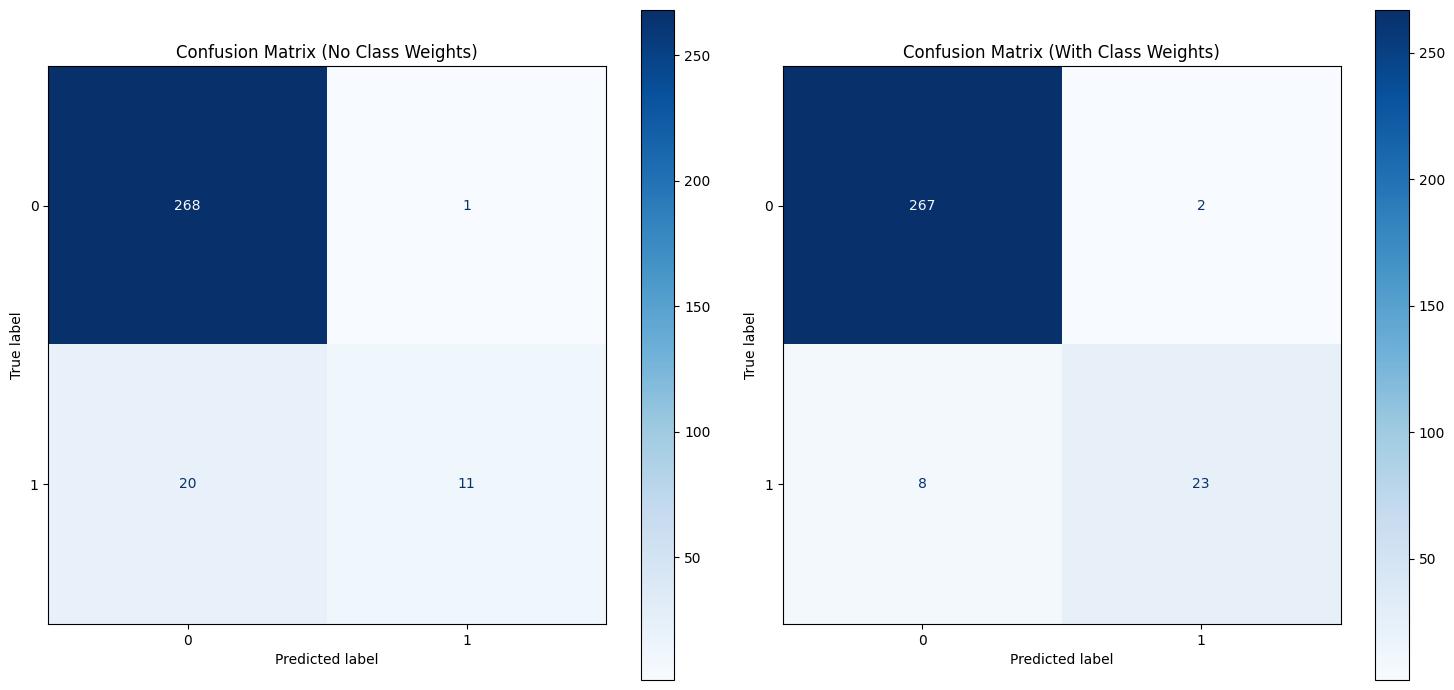


Comparison Summary:
Class weighting often helps the model pay more attention to the minority class,
potentially increasing Recall and F1-Score for that class, which is crucial
for imbalanced datasets where the minority class is often the one of interest.


In [14]:
#Q.28: Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # To create an imbalanced sample dataset
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight # To calculate class weights
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate an imbalanced sample classification dataset
# We'll create a binary classification dataset where one class is much rarer than the other.
# weights=[0.9, 0.1] means 90% of samples are class 0, and 10% are class 1 (the minority class).
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=10, n_classes=2, weights=[0.9, 0.1],
                           random_state=42)

print(f"Dataset shape: {X.shape}")
print(f"Class distribution: 0: {np.sum(y == 0)}, 1: {np.sum(y == 1)}")

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Using stratify=y ensures that both train and test sets have similar class distributions.

print(f"Train set class distribution: 0: {np.sum(y_train == 0)}, 1: {np.sum(y_train == 1)}")
print(f"Test set class distribution: 0: {np.sum(y_test == 0)}, 1: {np.sum(y_test == 1)}")

# --- Model 1: CatBoost Classifier WITHOUT Class Weighting ---
print("\n--- Training CatBoost Classifier WITHOUT Class Weighting ---")
cat_model_no_weights = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    random_seed=42,
    verbose=0 # Suppress training output
)

cat_model_no_weights.fit(X_train, y_train)

# Make predictions
y_pred_no_weights = cat_model_no_weights.predict(X_test)

# Evaluate performance
f1_no_weights = f1_score(y_test, y_pred_no_weights)
precision_no_weights = precision_score(y_test, y_pred_no_weights)
recall_no_weights = recall_score(y_test, y_pred_no_weights)
cm_no_weights = confusion_matrix(y_test, y_pred_no_weights)

print(f"  F1-Score (No Weights): {f1_no_weights:.4f}")
print(f"  Precision (No Weights): {precision_no_weights:.4f}")
print(f"  Recall (No Weights): {recall_no_weights:.4f}")
print("  Confusion Matrix (No Weights):\n", cm_no_weights)

# --- Model 2: CatBoost Classifier WITH Class Weighting ---
print("\n--- Training CatBoost Classifier WITH Class Weighting ---")

# Calculate class weights
# 'balanced' mode automatically calculates weights inversely proportional to class frequencies.
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, weights))
print(f"  Calculated Class Weights: {class_weights_dict}")

cat_model_with_weights = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    class_weights=class_weights_dict, # Apply calculated class weights
    random_seed=42,
    verbose=0 # Suppress training output
)

cat_model_with_weights.fit(X_train, y_train)

# Make predictions
y_pred_with_weights = cat_model_with_weights.predict(X_test)

# Evaluate performance
f1_with_weights = f1_score(y_test, y_pred_with_weights)
precision_with_weights = precision_score(y_test, y_pred_with_weights)
recall_with_weights = recall_score(y_test, y_pred_with_weights)
cm_with_weights = confusion_matrix(y_test, y_pred_with_weights)


print(f"  F1-Score (With Weights): {f1_with_weights:.4f}")
print(f"  Precision (With Weights): {precision_with_weights:.4f}")
print(f"  Recall (With Weights): {recall_with_weights:.4f}")
print("  Confusion Matrix (With Weights):\n", cm_with_weights)


# --- Visualize Confusion Matrices for Comparison ---
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot for model without weights
disp_no_weights = ConfusionMatrixDisplay(confusion_matrix=cm_no_weights, display_labels=cat_model_no_weights.classes_)
disp_no_weights.plot(cmap=plt.cm.Blues, ax=axes[0])
axes[0].set_title('Confusion Matrix (No Class Weights)')
axes[0].grid(False)


# Plot for model with weights
disp_with_weights = ConfusionMatrixDisplay(confusion_matrix=cm_with_weights, display_labels=cat_model_with_weights.classes_)
disp_with_weights.plot(cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title('Confusion Matrix (With Class Weights)')
axes[1].grid(False)


plt.tight_layout()
plt.show()

print("\nComparison Summary:")
print("Class weighting often helps the model pay more attention to the minority class,")
print("potentially increasing Recall and F1-Score for that class, which is crucial")
print("for imbalanced datasets where the minority class is often the one of interest.")


Training AdaBoost Classifier with different learning rates:
  Learning Rate: 0.1, Test Accuracy: 0.8367
  Learning Rate: 0.5, Test Accuracy: 0.9000
  Learning Rate: 1.0, Test Accuracy: 0.8733
  Learning Rate: 1.5, Test Accuracy: 0.8767
  Learning Rate: 2.0, Test Accuracy: 0.4767


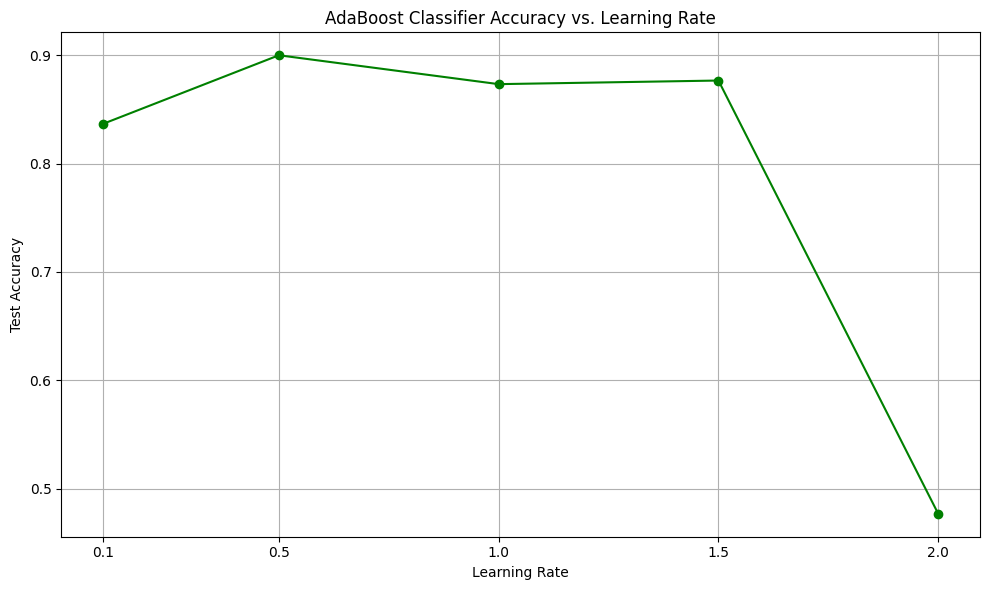


Comparison Complete: The plot above shows how accuracy changes with different learning rates.
A higher learning rate can lead to faster learning but might overshoot the optimal solution.
A lower learning rate can be more stable but might require more estimators and longer training time.


In [15]:
#Q.29: Train an AdaBoost Classifier and analyze the effect of different learning rates
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # AdaBoost often uses Decision Trees as base estimators
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # To create a sample dataset
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate a sample classification dataset
# We'll create a simple binary classification dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=42)

# 2. Split the dataset into training and testing sets
# This ensures we evaluate the model on data it hasn't seen during training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Define a range of learning rates to test
# These are the different step sizes for the contribution of each weak learner
learning_rates = [0.1, 0.5, 1.0, 1.5, 2.0] # Common range for learning rates

# Lists to store accuracy scores for each learning rate
accuracy_scores = []

print("Training AdaBoost Classifier with different learning rates:")

# 4. Loop through different learning rates, train, and evaluate
for lr in learning_rates:
    # Initialize AdaBoost Classifier with the current learning rate
    # Using DecisionTreeClassifier with max_depth=1 (a decision stump) as the base estimator
    ada_model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=100, # Keep n_estimators constant for this analysis
        learning_rate=lr, # Apply the current learning rate
        random_state=42
    )

    # Train the model
    ada_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = ada_model.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f"  Learning Rate: {lr:.1f}, Test Accuracy: {accuracy:.4f}")

# 5. Plot the results: Accuracy vs. Learning Rate
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracy_scores, marker='o', linestyle='-', color='green')
plt.xlabel("Learning Rate")
plt.ylabel("Test Accuracy")
plt.title("AdaBoost Classifier Accuracy vs. Learning Rate")
plt.grid(True)
plt.xticks(learning_rates) # Ensure all tested learning rates are shown on x-axis
plt.tight_layout()
plt.show()

print("\nComparison Complete: The plot above shows how accuracy changes with different learning rates.")
print("A higher learning rate can lead to faster learning but might overshoot the optimal solution.")
print("A lower learning rate can be more stable but might require more estimators and longer training time.")


In [18]:
#Q.30: Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # To create a sample multi-class dataset
from sklearn.metrics import log_loss # For evaluating multi-class classification
import numpy as np

# 1. Generate a sample multi-class classification dataset
# We'll create a dataset with 3 classes for demonstration purposes.
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, n_classes=3, # Specify 3 classes for multi-class
                           random_state=42)

# 2. Split the dataset into training and testing sets
# This is crucial for evaluating how well our model generalizes to unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize the XGBoost Classifier for multi-class
# objective: 'multi:softprob' outputs a probability for each class.
#            'multi:softmax' outputs the predicted class label directly,
#            but 'softprob' is needed for log_loss.
# num_class: Must be set to the number of unique classes in your target variable.
# n_estimators: The number of boosting rounds (trees).
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',  # For multi-class classification, outputs probabilities
    num_class=len(np.unique(y)), # Number of unique classes in the target variable
    n_estimators=100,            # Number of boosting rounds (trees)
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,     # Suppress warning for older versions
    eval_metric='mlogloss'       # Metric to monitor during training for multi-class log loss
)

# 4. Train the XGBoost Classifier
print("Training XGBoost Classifier for multi-class classification...")
xgb_model.fit(X_train, y_train)
print("Training complete.")

# 5. Get probability predictions for each class on the test set
# log_loss requires probability estimates for all classes.
y_pred_proba = xgb_model.predict_proba(X_test)

# 6. Evaluate the model using Log Loss (Cross-Entropy Loss)
# Log Loss penalizes confident incorrect predictions more heavily.
# It's suitable for multi-class classification where probabilities are important.
ll = log_loss(y_test, y_pred_proba)

print(f"\nLog Loss (Cross-Entropy Loss): {ll:.4f}")

print("\nAnalysis: A lower Log Loss value indicates better model performance,")
print("as it means the predicted probabilities are closer to the true labels.")


Training XGBoost Classifier for multi-class classification...


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:57:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training complete.

Log Loss (Cross-Entropy Loss): 0.4788

Analysis: A lower Log Loss value indicates better model performance,
as it means the predicted probabilities are closer to the true labels.
